<h1>Transformações Morfológicas</h1>
<p>Transformações Morfológicas são operações simples baseadas no formato/dimensões das imagens.</p>
<p><p>Em geral, essas operações são realizadas em imagens binárias e requerem três parâmetros: a imagem original, o elemento estruturante ('Kernel') e quantodade de vezes que é para fazer (iterações).</p>
<p>O 'Kernel' define a vizinhança que possui influência sobre o pixel, pode ser de diversos formatos. </p>
<p>Os métodos que mais utilizaremos são:</p>
<ul>
    <li><b>cv.dilate()</b>: 'dilatação'. Serve principalmente para reduzir ruídos pretos e 'aumentar' os objetos. Basta um pixel do 'kernel' ser 1 ou 255 (branco) para o pixel também receber branco.</li>
    <li><b>cv.erode()</b>: 'erosão'. Muito útil para reduzir ruídos brancos e 'diminuir'/ 'separar' os objetos. Precisa que todos os pixels do 'kernel' sejam brancos (1 ou 255) para o pixel também ser branco.</li>
    <li><b>cv.morphologyEx()</b>: com esse método é possivel aplicar outros métodos como:</li>
        <ol>
            <li>cv.MORPH_OPEN: 'erosão' seguida da 'dilatação'.</li>
            <li>cv.MORPH_CLOSE: 'dilatação' seguida da 'erosão'.</li>
            <li>cv.MORPH_GRADIENT: diferença entre 'dilatação' e 'erosão'. Praticamente pega o contorno do objeto.</li>
            <li>cv.MORPH_TOPHAT: diferença entre a imagem de 'abertura' (cv.MORPH_OPEN) e a imagem original.</li>
            <li>cv.MORPH_BLACKHAT: diferença entre a imagem de 'fechamento' (cv.MORPH_CLOSE) e a imagem original.</li>
        </ol>
    <li><b>cv.getStructuringElement(): é possível criar o 'kernel' a partir desse método ou utilizando Numpy. Utilizando o método, os mais comuns são:</li>
       <ol>
            <li>cv.MORPH_RECT: retângulo</li>
            <li>cv.MORPH_CROSS: cruz</li>
            <li>cv.MORPH_ELLIPSE: elipse</li>
        </ol>
</ul>

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

os.chdir("C:/Users/edub_/OneDrive/Área de Trabalho/PDI - IC/conteudo_p_teste")

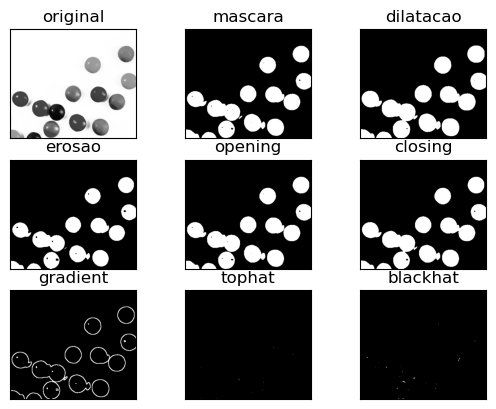

In [27]:
#lendo imagem em escala de cinza
img = cv.imread('smarties.png', 0)

#criando máscara/ imagem binária
_, mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV)

#criando kernel com numpy - vou utilizar o mesmo para todos os exemplos
kernel = np.ones((3, 3), np.uint8)

#dilatação
dilatacao = cv.dilate(mask, kernel, iterations=1) #observe os pontos pretos dentro das bolas - diminuem

#erosão
erosao = cv.erode(mask, kernel, iterations=1) #observe os pontos pretos dentro das bolas - aumentam

#abertura
openig = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2) #erosão depois dilatação

#fechamento 
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=1) #dilatação depois erosão

#gradiente
gradient = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel, iterations=1) #diferença entre erosão e dilatação - 'contorno'

#tophat
tophat = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernel, iterations=1) #diferença entre imagem de entrada e 'abertura'

#blackhat 
blackhat = cv.morphologyEx(mask, cv.MORPH_BLACKHAT, kernel, iterations=1) #diferenca entre imagem de entrada e 'fechamento'

#lista de imagens e de títulos
titulos = ['original', 'mascara', 'dilatacao', 'erosao', 'opening', 'closing', 'gradient', 'tophat', 'blackhat']
imagens = [img, mask, dilatacao, erosao, opening, closing, gradient, tophat, blackhat]

#exibindo imagens
for i in range(len(imagens)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagens[i], 'gray')
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()
    